<a href="https://colab.research.google.com/github/danielmartincampos/TP6-FIA-CAMPOSDANIEL/blob/main/TRABAJO_PRACTICO_N%C2%B0_6_FIA_CAMPOS_DANIEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("neuralnet")
install.packages("NeuralNetTools")
install.packages("ggplot2")
install.packages("gridExtra")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Deriv’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(neuralnet)
library(NeuralNetTools)
library(ggplot2)
library(gridExtra)

In [3]:
set.seed(134678)
X1<- c(rnorm(50,5,2),rnorm(50,11,2))
X2<- c(rnorm(50,5,2),rnorm(50,11,2))
clase<- c(rep(1,50),rep(0,50))

HOLD-OUT 70% ENTRENAMIENTO 30% PRUEBA

In [4]:
set.seed(134678)
indice.test1<-sample(1:50,15)
indice.test0<-sample(51:100,15)
X1tr<-X1[-c(indice.test1,indice.test0)]
X2tr<-X2[-c(indice.test1,indice.test0)]
X1test<-X1[c(indice.test1,indice.test0)]
X2test<-X2[c(indice.test1,indice.test0)]
clase_tr<-clase[-c(indice.test1,indice.test0)]
clase_test<-clase[c(indice.test1,indice.test0)]
dataset_train_RNA<-data.frame(X1tr,X2tr,clase_tr)
dataset_test<-data.frame(X1test,X2test,clase_test)

In [5]:
pdf("Grafica_dataset_test.pdf")
ggplot(data=dataset_test, aes(x=X1test, y=X2test, color=as.factor(clase_test)))+
  geom_point()+
  labs(title = "dataset test", x="X1", y="X2")+
  scale_color_manual(values = c("blue","red"),name="clase")
dev.off()

png 
  2

RED NEURONAL CON 10 NEURONAS EN LA CAPA OCULTA

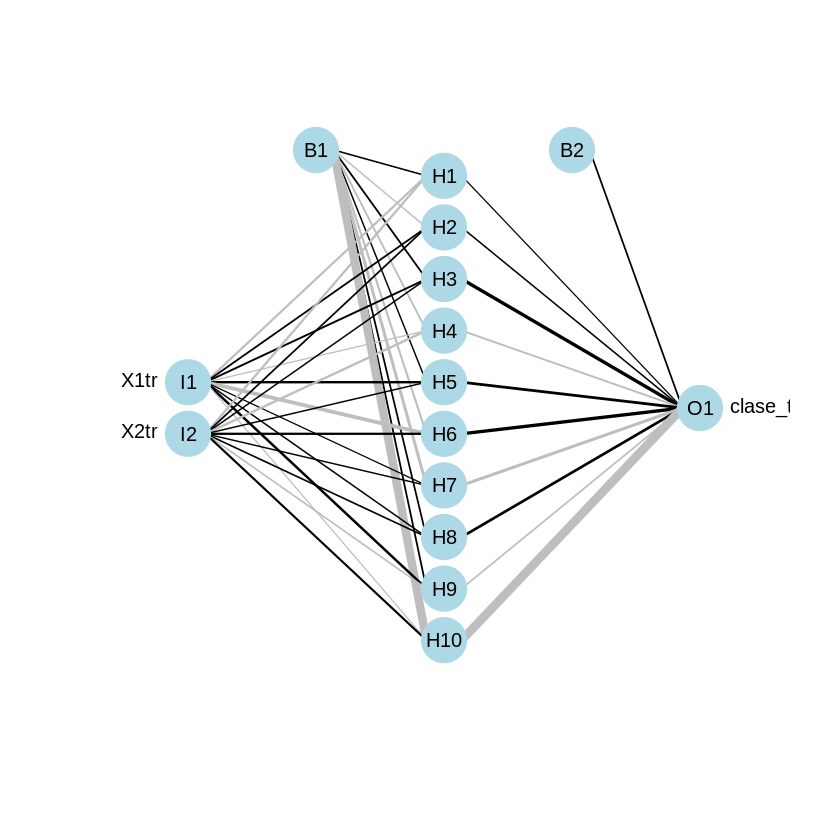

In [6]:
red<-neuralnet(
   clase_tr~X1tr+X2tr,
   dataset_train_RNA,
   hidden=10,
   linear.output= FALSE,
   act.fct="logistic",
   algorithm="backprop",
   threshold=0.01,
   learningrate=0.005,
   rep=10
)
plotnet(red,rep= "best")

In [7]:
pred<-compute(red,dataset_test[,-3])

In [8]:
pred$net.result

0.999892162
0.999975018
0.721692603
0.999880247
0.999219685
0.999836449
0.999887312
0.999879561
0.999797808
0.804844238
0.999853738


In [9]:
predicciones_RNA<-round(pred$net.result)
ErrorC_RNA<-sum(predicciones_RNA!=dataset_test[,3])/length(dataset_test[,3])
print(ErrorC_RNA)

[1] 0.1666667


PUNTO 6

In [10]:
predicciones<-cbind(dataset_test[,1:2],predicciones_RNA)

In [11]:
pdf("Grafica_dataset_test.pdf")
ggplot(data = as.data.frame(predicciones), aes(x=X1test, y=X2test, color=as.factor(predicciones_RNA)))+
  geom_point()+
  labs(title = "dataset test", x="X1", y="X2")+
  scale_color_manual(values = c("blue","red"),name="clase")
dev.off

function (which = dev.cur()) 
{
    if (which == 1) 
        stop("cannot shut down device 1 (the null device)")
    .External(C_devoff, as.integer(which))
    dev.cur()
}
<bytecode: 0x59fd64153b68>
<environment: namespace:grDevices>

COMPARACIONES

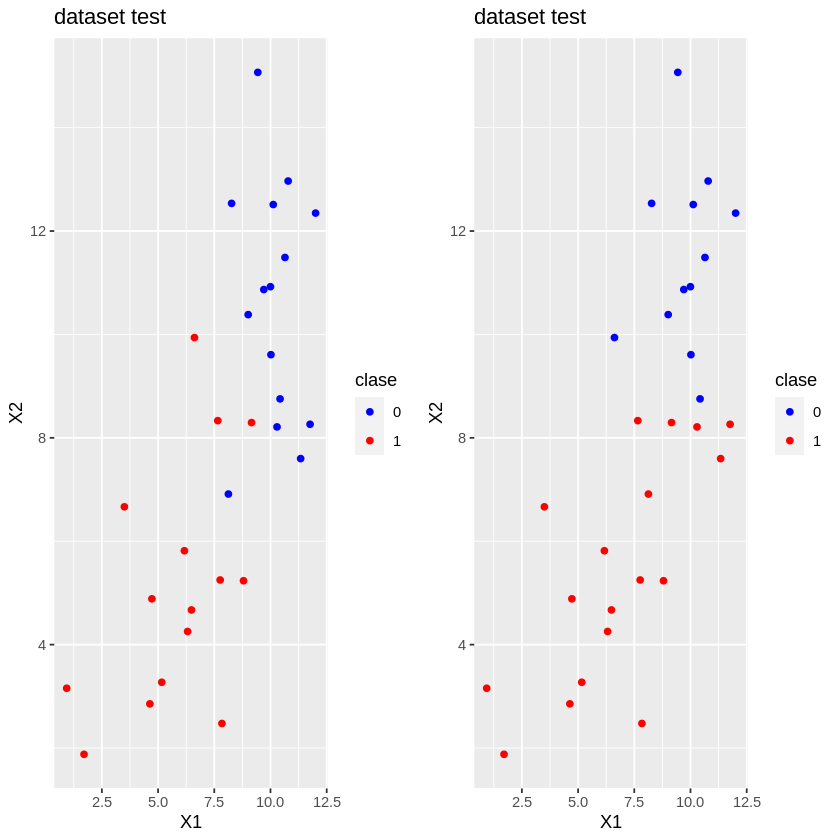

In [12]:
plot_dataset_test<-ggplot(data=dataset_test, aes(x=X1test, y=X2test, color=as.factor(clase_test)))+
  geom_point()+
  labs(title = "dataset test", x="X1", y="X2")+
  scale_color_manual(values = c("blue","red"),name="clase")
plot_predicciones<-ggplot(data = as.data.frame(predicciones), aes(x=X1test, y=X2test, color=as.factor(predicciones_RNA)))+
  geom_point()+
  labs(title = "dataset test", x="X1", y="X2")+
  scale_color_manual(values = c("blue","red"),name="clase")
grid.arrange(plot_dataset_test,plot_predicciones, ncol=2)

RED NEURONAL CON 6 NEURONAS EN LA CAPA OCULTA

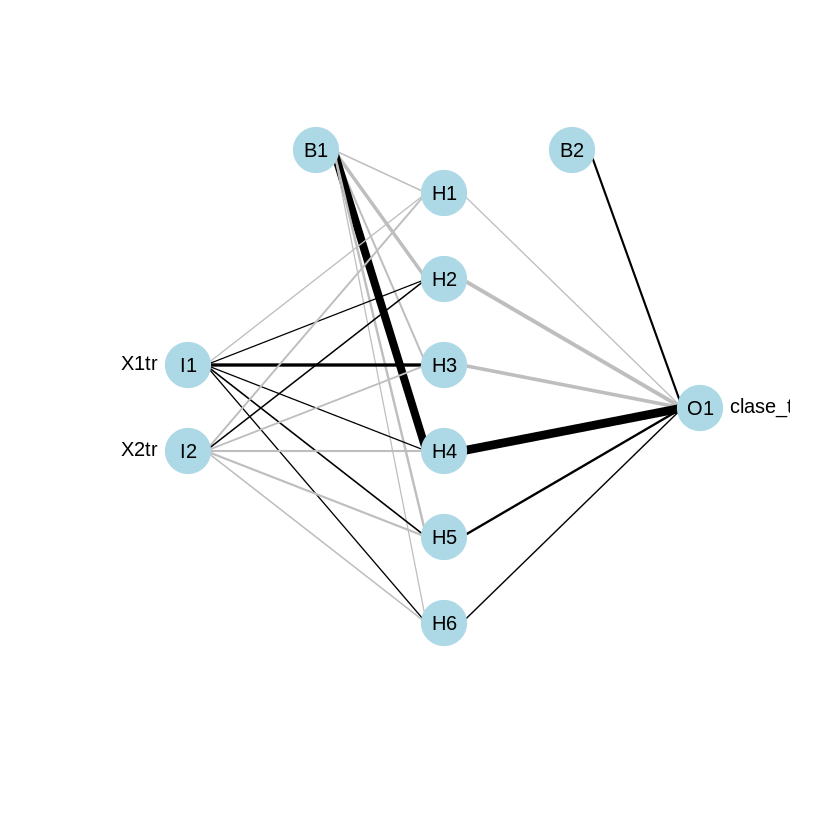

In [13]:
red<-neuralnet(
   clase_tr~X1tr+X2tr,
   dataset_train_RNA,
   hidden=(6),
   linear.output= FALSE,
   act.fct="logistic",
   algorithm="backprop",
   threshold=0.01,
   learningrate=0.005,
   rep=10
)
plotnet(red,rep= "best")

In [14]:
pred<-compute(red,dataset_test[,-3])

In [15]:
pred$net.result

0.9999824104
0.9999985734
0.7217365130
0.9999623061
0.9994590735
0.9999375437
0.9999661761
0.9999767481
0.9999143849
0.8028095409
0.9999479914


In [16]:
predicciones_RNA_6NEURONAS<-round(pred$net.result)
ErrorC_RNA_6NEURONAS<-sum(predicciones_RNA_6NEURONAS!=dataset_test[,3])/length(dataset_test[,3])
print(ErrorC_RNA_6NEURONAS)

[1] 0.1666667
